In [1]:
%matplotlib inline
import os
home_folder = os.path.expanduser("~")
print(home_folder)

data_filename = "ionosphere.data.txt"
print(data_filename)

C:\Users\sheth
ionosphere.data.txt


In [16]:
import csv
import numpy as np
from pprint import pprint
# Size taken from the dataset and is known already
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')


with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

print(y[0:2])        


[ True False]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [18]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [19]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))
print(y_predicted[0:20])
print(y_test[0:20])

The accuracy is 86.4%
[ True  True  True  True  True False  True False  True  True  True  True
  True  True False False  True False False  True]
[ True False  True  True  True False  True False  True  True  True False
 False  True False False  True  True False  True]


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(estimator, X, y, scoring='accuracy', cv = 5)
print(scores[0:20])
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

[0.83098592 0.77142857 0.8        0.88571429 0.84285714]
The average accuracy is 82.6%


In [37]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 101))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=3)
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

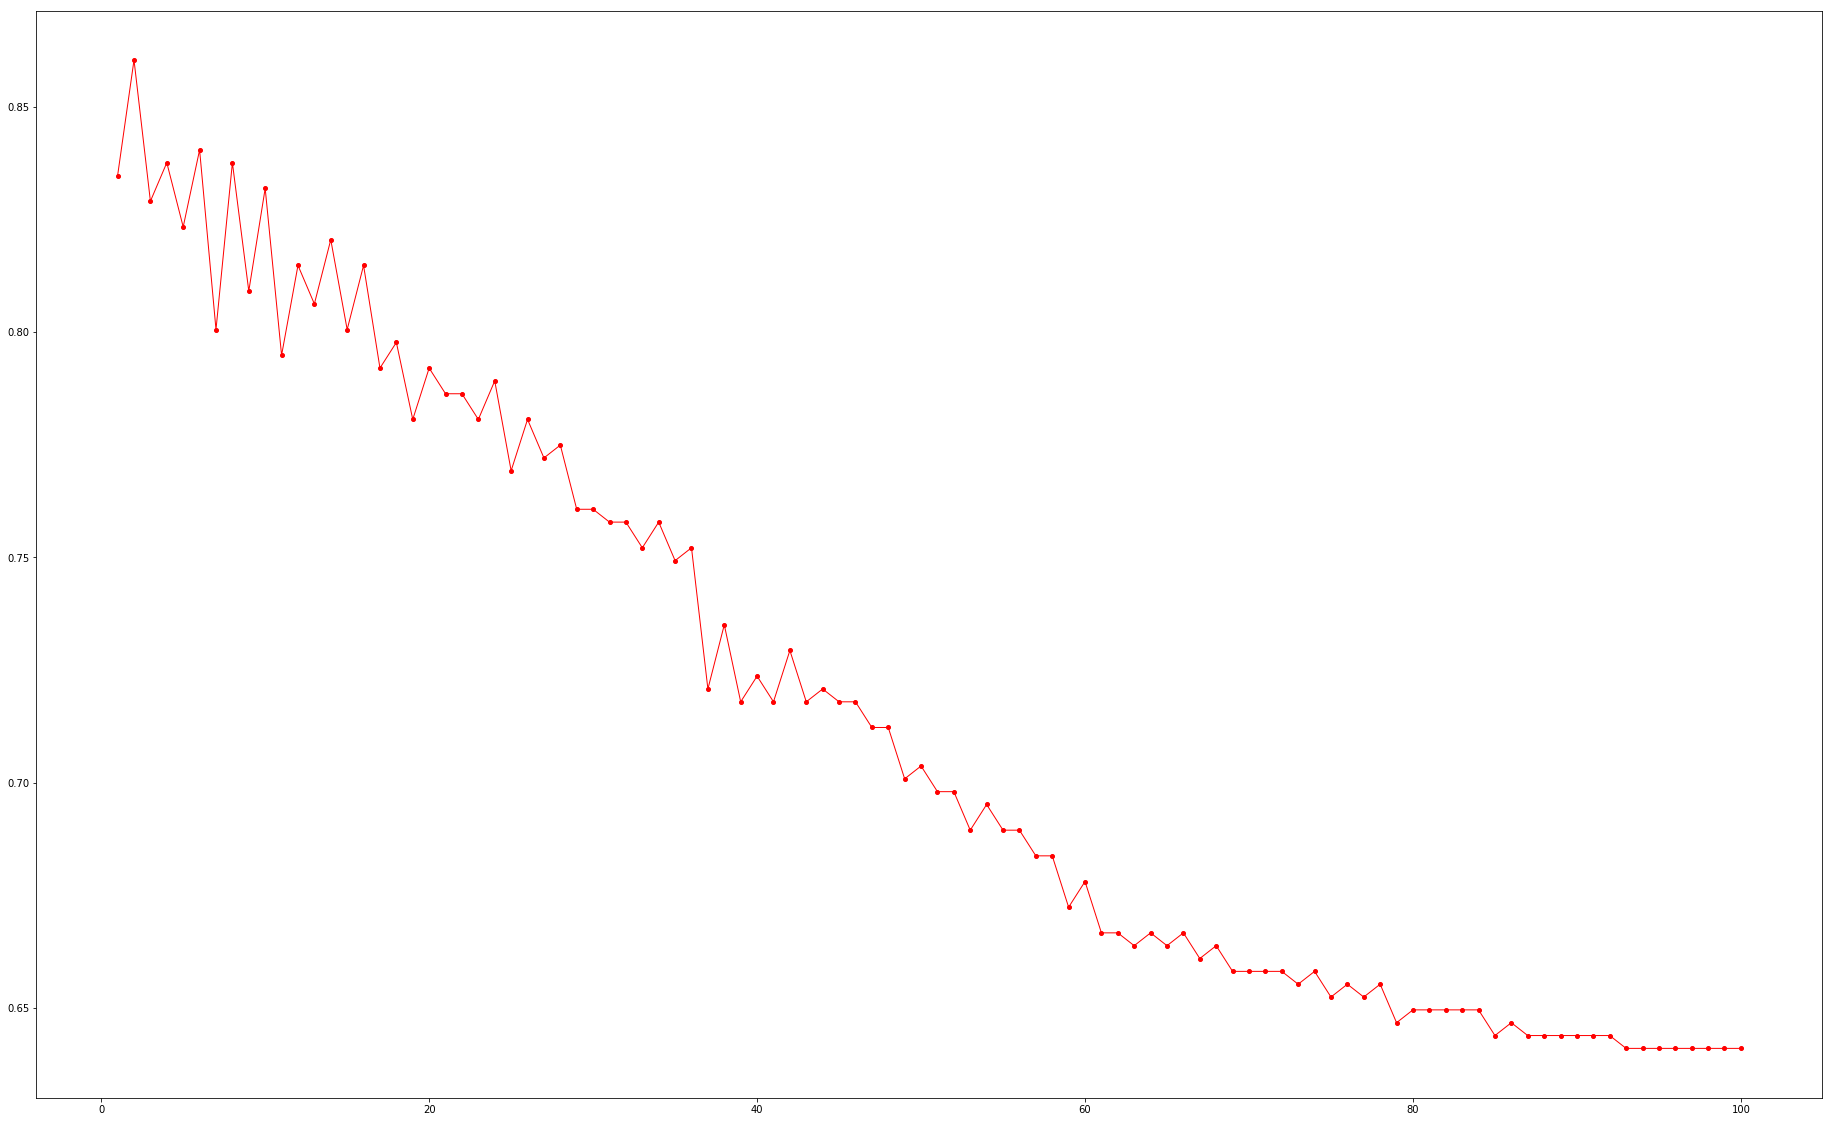

In [40]:
plt.plot?
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, 'ro-', linewidth=1, markersize=4)
#plt.axis([0, max(parameter_values), 0, 1.0])

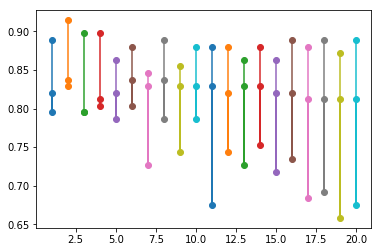

In [11]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

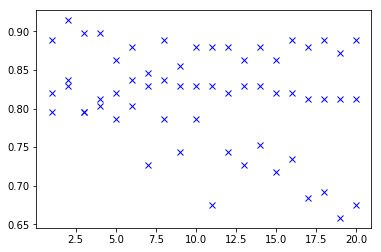

In [12]:
plt.plot(parameter_values, all_scores, 'bx')

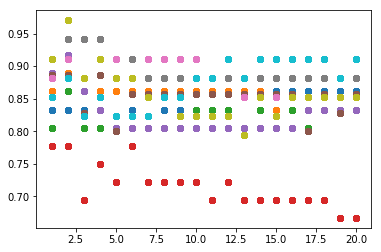

In [13]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

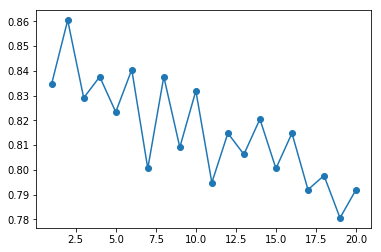

In [14]:
plt.plot(parameter_values, avg_scores, '-o')

In [42]:
X_broken = np.array(X)

In [51]:
X_broken[:,::2] /= 10

print(X[0])
print(X_broken[0])

[ 1.       0.       0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708
  1.       0.0376   0.85243 -0.17755  0.59755 -0.44945  0.60536 -0.38223
  0.84356 -0.38542  0.58212 -0.32192  0.56971 -0.29674  0.36946 -0.47357
  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.3409   0.42267 -0.54487
  0.18641 -0.453  ]
[ 1.0000e-09  0.0000e+00  9.9539e-09 -5.8890e-02  8.5243e-10  2.3060e-02
  8.3398e-09 -3.7708e-01  1.0000e-09  3.7600e-02  8.5243e-09 -1.7755e-01
  5.9755e-10 -4.4945e-01  6.0536e-09 -3.8223e-01  8.4356e-10 -3.8542e-01
  5.8212e-09 -3.2192e-01  5.6971e-10 -2.9674e-01  3.6946e-09 -4.7357e-01
  5.6811e-10 -5.1171e-01  4.1078e-09 -4.6168e-01  2.1266e-10 -3.4090e-01
  4.2267e-09 -5.4487e-01  1.8641e-10 -4.5300e-01]


In [53]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,   scoring='accuracy' , cv=3)
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y,  scoring='accuracy', cv=3)
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

from sklearn.preprocessing import MinMaxScaler
X_transformed = MinMaxScaler().fit_transform(X)


X_transformed = MinMaxScaler().fit_transform(X)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y,   scoring='accuracy' , cv=3)
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The original average accuracy for is 82.3%
The 'broken' average accuracy for is 70.1%
The average accuracy for is 82.3%


In [18]:
from sklearn.pipeline import Pipeline

scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                             ('predict', KNeighborsClassifier())])

scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy', cv=3)
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The pipeline scored an average accuracy for is 82.3%
